<a href="https://colab.research.google.com/github/divych1/Play_Store-App_Data_Analysis/blob/main/Divy_Chanchawat_Team_2_Capstone_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

Today in the era of information technology it is quite interesting to move a step ahead , from the world of information technology to the world of machine learning and artificial inteligence. we have started the revolution with help of data science and many new technologies are yet to come. The field of data science has helped us analyse the data and draw out some useful conclusions for a well planned future with lesser risks and better satisfaction/

The thing that has supported the most, to bringout this revolution is our mobile phones play store that have a huge collection of applications through which we carry out all our tasks and transactions.

The applications and their success depends on many factors and we have to analyse on the basis of the data that contains a lot of information on app category, rating, 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
working_directory = '/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/'
file_name_playstore = 'googleplaystore.csv'
file_name_reviews = 'googleplaystore_user_reviews.csv'
df_play_store = pd.read_csv(working_directory + file_name_playstore )
df_reviews = pd.read_csv(working_directory + file_name_reviews )

In [4]:
df_play_store

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
df_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [6]:
df_play_store.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
df_play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df_play_store['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10841, dtype: object

In [13]:
index_of_row_to_del = df_play_store[df_play_store['Reviews']=='3.0M'].index
df_play_store.drop(index_of_row_to_del , inplace=True)

In [14]:
df_play_store['Reviews'] = df_play_store['Reviews'].astype(str).astype(float)

In [15]:
df_play_store['Reviews']

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 10840, dtype: float64

In [16]:
df_play_store['Installs'] = df_play_store['Installs'].map(lambda x: x.rstrip("+"))

In [17]:
df_play_store['Installs']  = df_play_store['Installs'].str.replace(',', "").replace('.', "").astype(float)

In [18]:
df_play_store

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,5000.0,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100.0,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5M,1000.0,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,1000.0,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [21]:
df_play_store_group = df_play_store.groupby(['Category']).mean()
df_play_store_group

,Rating,Reviews,Installs
Category,,,
ART_AND_DESIGN,4.358065,2.637600e+04,1.912894e+06
AUTO_AND_VEHICLES,4.190411,1.369019e+04,6.250613e+05
BEAUTY,4.278571,7.476226e+03,5.131519e+05
BOOKS_AND_REFERENCE,4.346067,9.506090e+04,8.318050e+06
BUSINESS,4.121452,3.033598e+04,2.178076e+06
COMICS,4.155172,5.638793e+04,9.347692e+05
COMMUNICATION,4.158537,2.107138e+06,8.435989e+07
DATING,3.970769,3.115931e+04,1.129533e+06
EDUCATION,4.389032,2.538191e+05,5.586231e+06


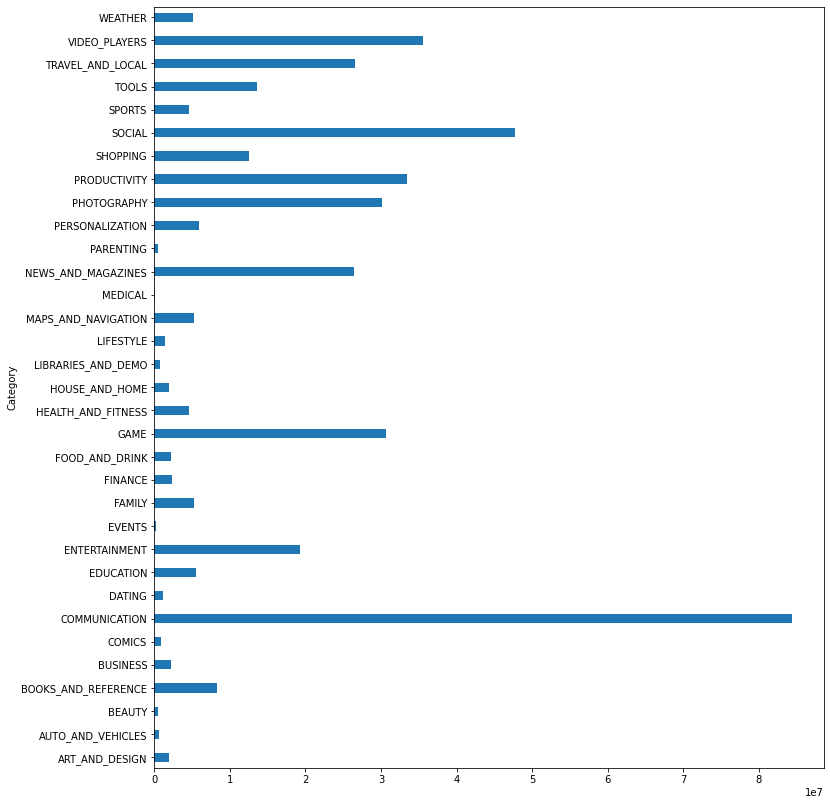

In [22]:
df_play_store_group['Installs'].plot(kind='barh',figsize=(12, 14), zorder=2, width=0.4)

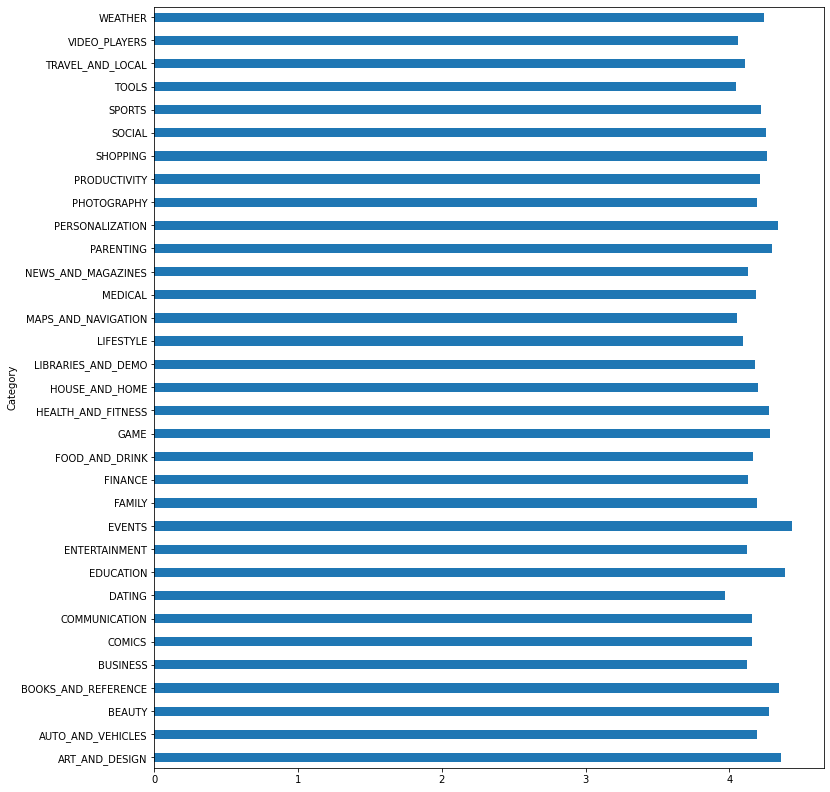

In [23]:
df_play_store_group['Rating'].plot(kind='barh',figsize=(12, 14), zorder=2, width=0.4)

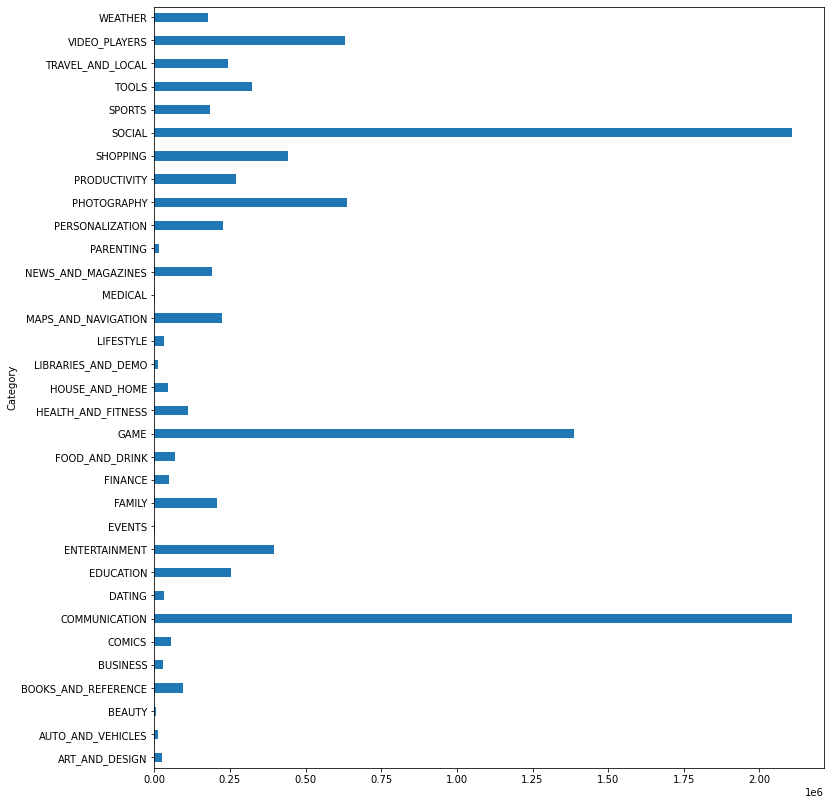

In [24]:
df_play_store_group['Reviews'].plot(kind='barh',figsize=(12, 14), zorder=2, width=0.4)

In [25]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [26]:
df_reviews.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


75% times sentiment polarity is 0.4 which is positive and median sentiment subjectivity is 0.51 

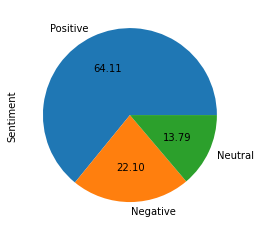

In [27]:
df_reviews['Sentiment'].value_counts().plot(kind='pie',autopct='%.2f')

In [28]:
df_reviews.isna().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [29]:
# Apps with more than or equal to 1 billion downloads
df_play_store[df_play_store['Installs'] >= 1000000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233.0,Varies with device,1.000000e+09,Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
386,Hangouts,COMMUNICATION,4.0,3419433.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169.0,Varies with device,1.000000e+09,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


In [31]:
df_play_store[df_play_store['Rating']>=4.5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121.0,3.1M,10000.0,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
13,Mandala Coloring Book,ART_AND_DESIGN,4.6,4326.0,21M,100000.0,Free,0,Everyone,Art & Design,"June 26, 2018",1.0.4,4.4 and up
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632.0,5.5M,500000.0,Free,0,Everyone,Art & Design,"July 31, 2018",3.1,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,619k,1000.0,Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,5000.0,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100.0,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,1000.0,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [32]:
len(df_play_store[df_play_store['Rating']>=4.5])

2955

checking apps with rating>=4.5 and installs> 1 billion

In [34]:
df_ = df_play_store[(df_play_store['Rating']>=4.5) & (df_play_store['Installs'] >= 1.000000e+09)]

In [41]:
df_.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=True)
df_

,Rating,Reviews,Installs
Category,,,
GAME,4.5,27721321.20,1.000000e+09
PHOTOGRAPHY,4.5,10855956.75,1.000000e+09
SOCIAL,4.5,66554892.00,1.000000e+09


In [43]:
df_group = df_.groupby(by='Category').mean()
df_group

,Rating,Reviews,Installs
Category,,,
GAME,4.5,27721321.20,1.000000e+09
PHOTOGRAPHY,4.5,10855956.75,1.000000e+09
SOCIAL,4.5,66554892.00,1.000000e+09


In [51]:
df_group = df_.groupby(by='App').mean()
df_group

,Rating,Reviews,Installs
App,,,
Google Photos,4.5,10855956.75,1.000000e+09
Instagram,4.5,66554892.00,1.000000e+09
Subway Surfers,4.5,27721321.20,1.000000e+09


So, If we consider that the Apps which have got Ratings more than 4.5  and more than 1 billion downloads are more successfull then the categories of Apps which we have got after our analysis are GAME,PHOTOGRAPHY and SOCIAL.
App names particularly are Subway Surfers, GOOGLE PHOTOS and INSTAGRAM in GAME,PHOTOGRAPHY and SOCIAL category respectively. 

